In [1]:
import pandas


In [2]:
df = pandas.read_csv("JellyTime.csv")

In [3]:
axes = df.plot(x="time (s)", y=["Jellyfish 1 Area (cm^2)", "Jellyfish 2 Area (cm^2)", "Jellyfish 3 Area (cm^2)","Jellyfish 4 Area (cm^2)",
                            "Jellyfish 5 Area (cm^2)", "Jellyfish 6 Area (cm^2)","Jellyfish 7 Area (cm^2)","Jellyfish 8 Area (cm^2)"], subplots=True,figsize=(10,80), legend=False)

In [4]:
import numpy as np
import pandas as pd
import scipy.signal

import bebi103
import bokeh


C:\Users\WJang\Anaconda3\lib\site-packages\bebi103\viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")


In [5]:
df.head


<bound method NDFrame.head of       frames Time of Day  Jellyfish 1 Area (cm^2)  Jellyfish 2 Area (cm^2)  \
0          0         day                20.860627                22.313317   
1          1         day                20.793580                22.107706   
2          2         day                21.598147                21.799289   
3          3         day                22.420593                20.404706   
4          4         day                23.564866                19.036943   
5          5         day                24.762776                18.013355   
6          6         day                25.665679                16.757337   
7          7         day                26.702676                16.448920   
8          8         day                27.489363                16.703699   
9          9         day                27.891647                17.316064   
10        10         day                28.200064                17.995476   
11        11         day          

In [6]:
# Get sampling rate from first two points
inter_sample_time = df['time (s)'][1] - df['time (s)'][0]
print('inter_sample_time =', inter_sample_time, 's')

# Check to make sure they are all the same
print('All the same?:', np.allclose(np.diff(df['time (s)']), inter_sample_time))
sampling_freq =  1 / inter_sample_time
print(df)
dfDay = df.loc[df['Time of Day'] == "day"]
dfNight = df.loc[df['Time of Day'] == "night"]

print(dfDay)
print(dfNight)

inter_sample_time = 0.066666667 s
All the same?: False
      frames Time of Day  Jellyfish 1 Area (cm^2)  Jellyfish 2 Area (cm^2)  \
0          0         day                20.860627                22.313317   
1          1         day                20.793580                22.107706   
2          2         day                21.598147                21.799289   
3          3         day                22.420593                20.404706   
4          4         day                23.564866                19.036943   
5          5         day                24.762776                18.013355   
6          6         day                25.665679                16.757337   
7          7         day                26.702676                16.448920   
8          8         day                27.489363                16.703699   
9          9         day                27.891647                17.316064   
10        10         day                28.200064                17.995476   
11       

[8000 rows x 11 columns]
      frames Time of Day  Jellyfish 1 Area (cm^2)  Jellyfish 2 Area (cm^2)  \
0          0         day                20.860627                22.313317   
1          1         day                20.793580                22.107706   
2          2         day                21.598147                21.799289   
3          3         day                22.420593                20.404706   
4          4         day                23.564866                19.036943   
5          5         day                24.762776                18.013355   
6          6         day                25.665679                16.757337   
7          7         day                26.702676                16.448920   
8          8         day                27.489363                16.703699   
9          9         day                27.891647                17.316064   
10        10         day                28.200064                17.995476   
11        11         day               

[4000 rows x 11 columns]
      frames Time of Day  Jellyfish 1 Area (cm^2)  Jellyfish 2 Area (cm^2)  \
4000       0       night                16.775216                18.688297   
4001       1       night                17.253487                18.420108   
4002       2       night                18.089342                17.584253   
4003       3       night                19.054822                17.767515   
4004       4       night                19.626958                18.071463   
4005       5       night                20.404706                18.491625   
4006       6       night                21.566858                19.300662   
4007       7       night                22.644084                19.814691   
4008       8       night                23.198341                20.337659   
4009       9       night                23.439711                20.865097   
4010      10       night                22.872044                21.504281   
4011      11       night               

[4000 rows x 11 columns]


C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


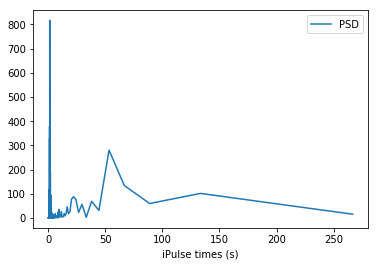

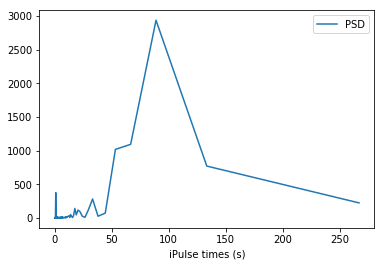

In [7]:
# Truncated signal for faster calculation
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 1 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 1 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


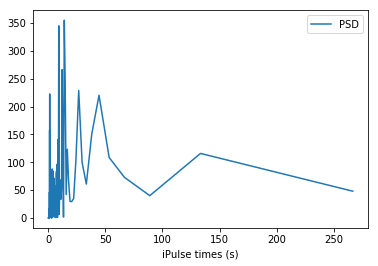

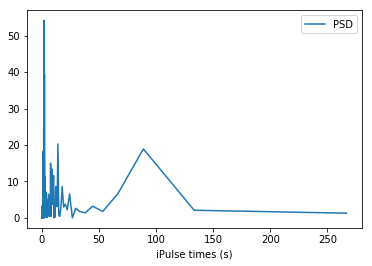

In [8]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 2 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 2 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


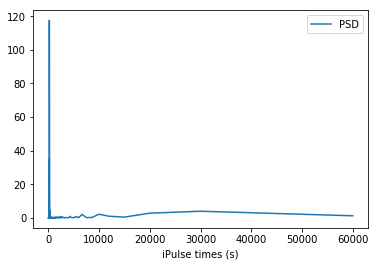

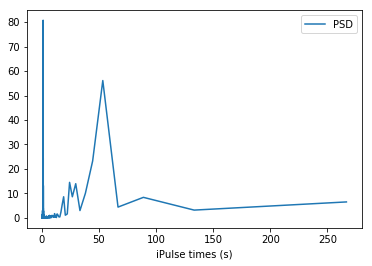

In [9]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 3 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/np.fft.fftfreq(len(V_trunc)) * sampling_freq

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 3 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


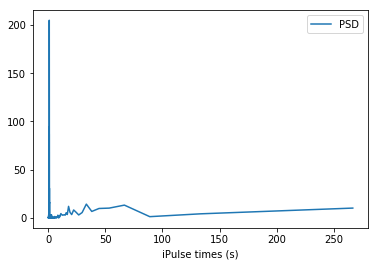

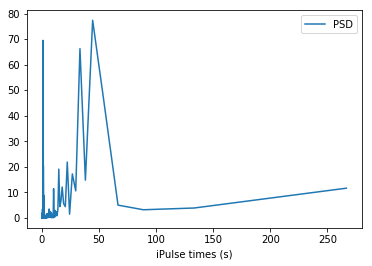

In [11]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 4 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 4 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


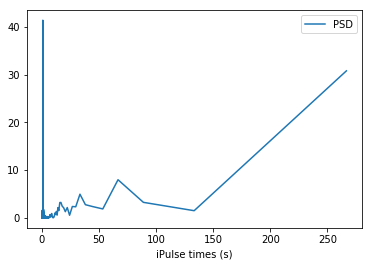

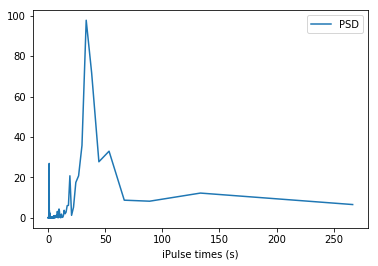

In [12]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 5 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 5 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


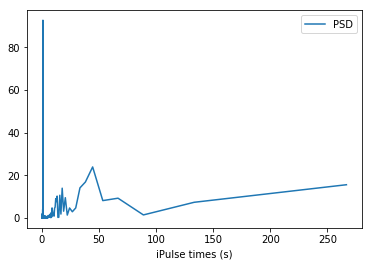

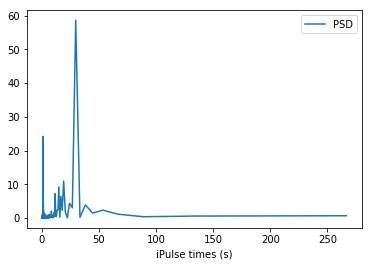

In [13]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 6 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 6 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


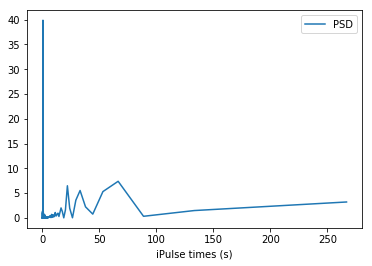

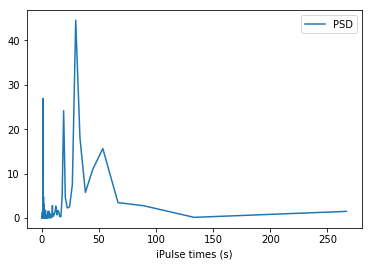

In [14]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 7 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 7 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\WJang\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


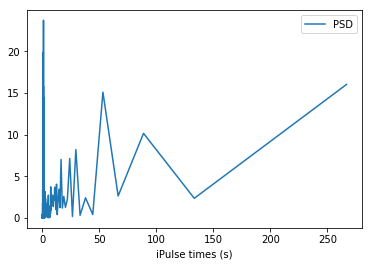

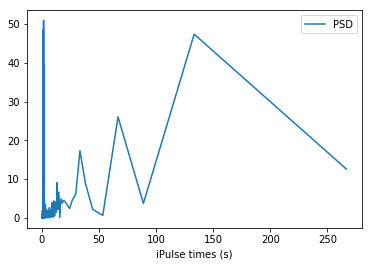

In [15]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = dfDay['Jellyfish 8 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")

V_trunc = dfNight['Jellyfish 8 Area (cm^2)'].values[:max_ind]
# Determine frequencies
f = 1/(np.fft.fftfreq(len(V_trunc)) * sampling_freq)

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'iPulse times (s)': f[f>0], 'PSD': psd[f>0]})
df_psd.plot(x='iPulse times (s)', y="PSD")